# HW 4 - Simulated Annealing

## Part A - Further problems with descent algorithms


Starting Point 1:
Initializing with $\lambda_1$ = -2.47865, $\lambda_2$ = 0

In [13]:
import theano
from theano import *
import theano.tensor as T
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:

    start_time = time.time()
    ##for 
    la1 = theano.shared(value=-np.float(2.47865), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    x = T.dvector("x")
    y = T.dvector("y")

    ##Construct Theano expression graph
    loss = (0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    cost = 1000*T.mean(loss)
    gw = T.grad(cost=cost, wrt=la1)
    gb = T.grad(cost=cost, wrt=la2)                 

    eta = step # Learning rate
    train = theano.function(
              inputs=[x,y],
              outputs=[cost],
              updates=((la1, la1 - eta * gw), (la2, la2 - eta * gb)),
              name='train',allow_input_downcast=True)

    n_epochs = 100000

    errors = np.zeros(n_epochs)
    lambda1 = []
    lambda2 = []

    for i in range(n_epochs):
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        #remove the multiplier effect to compare the actual average cost
        errors[i] = train(xi,yi)[0]/1000  
        #stopping function
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',i)
            errors = errors[:i+1]
            break
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    print("%f seconds" % (time.time() - start_time))


138.660021 seconds
113.830392 seconds
81.990649 seconds
83.912197 seconds
82.278730 seconds


Visualizing the cost minimalization during the batch gradient descent:

(1.0, 99999.0, 0.00051009554368611806, 0.00074716126926635486)

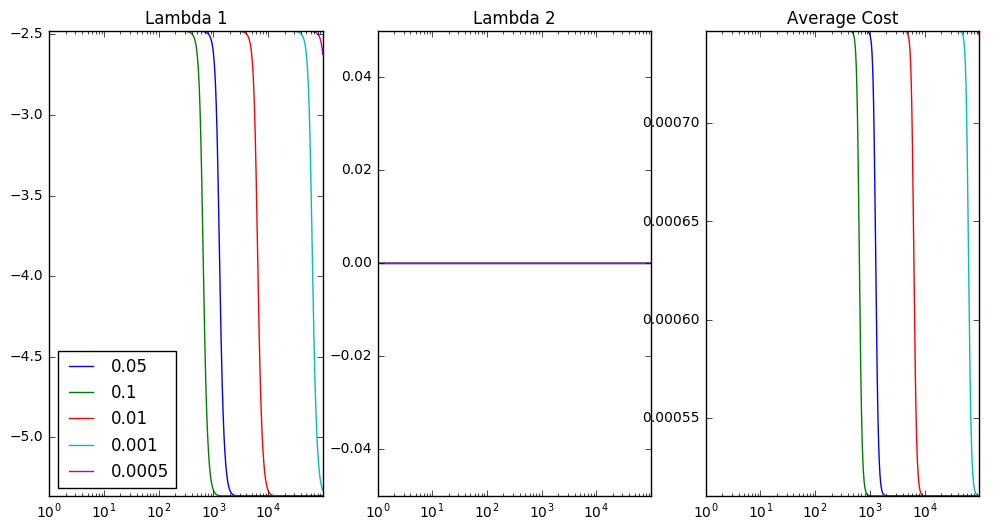

In [31]:
print()
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))
axes[0].semilogx(range(len(dict_lambda1[0.05])), dict_lambda1[0.05],'b',label='0.05')
axes[0].semilogx(range(len(dict_lambda1[0.1])), dict_lambda1[0.1],'g',label='0.1')
axes[0].semilogx(range(len(dict_lambda1[0.01])), dict_lambda1[0.01],'r',label='0.01')
axes[0].semilogx(range(len(dict_lambda1[0.001])), dict_lambda1[0.001],'c',label='0.001')
axes[0].semilogx(range(len(dict_lambda1[0.0005])), dict_lambda1[0.0005],'m',label='0.0005')
axes[0].set_title("Lambda 1")
axes[0].axis('tight')
axes[0].legend(loc='lower left')

axes[1].semilogx(range(len(dict_lambda2[0.05])), dict_lambda2[0.05],'b',label='0.05')
axes[1].semilogx(range(len(dict_lambda2[0.1])), dict_lambda2[0.1],'g',label='0.1')
axes[1].semilogx(range(len(dict_lambda2[0.01])), dict_lambda2[0.01],'r',label='0.01')
axes[1].semilogx(range(len(dict_lambda2[0.001])), dict_lambda2[0.001],'c',label='0.001')
axes[1].semilogx(range(len(dict_lambda2[0.0005])), dict_lambda2[0.0005],'m',label='0.0005')
axes[1].set_title("Lambda 2")
axes[1].axis('tight')

axes[2].semilogx(range(len(dict_error[0.05])), dict_error[0.05],'b',label='0.05')
axes[2].semilogx(range(len(dict_error[0.1])), dict_error[0.1],'g',label='0.1')
axes[2].semilogx(range(len(dict_error[0.01])), dict_error[0.01],'r',label='0.01')
axes[2].semilogx(range(len(dict_error[0.001])), dict_error[0.001],'c',label='0.001')
axes[2].semilogx(range(len(dict_error[0.0005])), dict_error[0.0005],'m',label='0.0005')
axes[2].set_title("Average Cost")
axes[2].axis('tight')



Starting Pt 2: Initializing with $\lambda_1$ = -3, $\lambda_2$ = 0

In [32]:
import theano
from theano import *
import theano.tensor as T
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:

    start_time = time.time()
    ##for 
    la1 = theano.shared(value=-np.float(3), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    x = T.dvector("x")
    y = T.dvector("y")

    ##Construct Theano expression graph
    loss = (0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    cost = 1000*T.mean(loss)
    gw = T.grad(cost=cost, wrt=la1)
    gb = T.grad(cost=cost, wrt=la2)                 

    eta = step # Learning rate
    train = theano.function(
              inputs=[x,y],
              outputs=[cost],
              updates=((la1, la1 - eta * gw), (la2, la2 - eta * gb)),
              name='train',allow_input_downcast=True)

    n_epochs = 100000

    errors = np.zeros(n_epochs)
    lambda1 = []
    lambda2 = []

    for i in range(n_epochs):
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        #remove the multiplier effect to compare the actual average cost
        errors[i] = train(xi,yi)[0]/1000  
        #stopping function
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',i)
            errors = errors[:i+1]
            break
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    print("%f seconds" % (time.time() - start_time))


89.643843 seconds
84.933120 seconds
80.737111 seconds
81.517661 seconds
81.269487 seconds


Visualizing the cost minimalization during the batch gradient descent:

-3,0


(1.0, 99999.0, 0.00051009554368611199, 0.00072221220791866651)

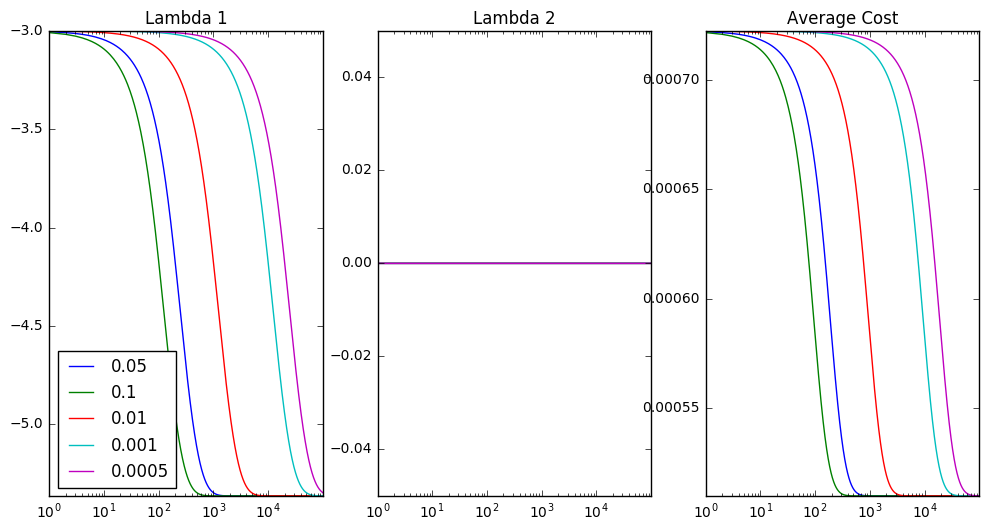

In [33]:
print('-3,0')
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))
axes[0].semilogx(range(len(dict_lambda1[0.05])), dict_lambda1[0.05],'b',label='0.05')
axes[0].semilogx(range(len(dict_lambda1[0.1])), dict_lambda1[0.1],'g',label='0.1')
axes[0].semilogx(range(len(dict_lambda1[0.01])), dict_lambda1[0.01],'r',label='0.01')
axes[0].semilogx(range(len(dict_lambda1[0.001])), dict_lambda1[0.001],'c',label='0.001')
axes[0].semilogx(range(len(dict_lambda1[0.0005])), dict_lambda1[0.0005],'m',label='0.0005')
axes[0].set_title("Lambda 1")
axes[0].axis('tight')
axes[0].legend(loc='lower left')

axes[1].semilogx(range(len(dict_lambda2[0.05])), dict_lambda2[0.05],'b',label='0.05')
axes[1].semilogx(range(len(dict_lambda2[0.1])), dict_lambda2[0.1],'g',label='0.1')
axes[1].semilogx(range(len(dict_lambda2[0.01])), dict_lambda2[0.01],'r',label='0.01')
axes[1].semilogx(range(len(dict_lambda2[0.001])), dict_lambda2[0.001],'c',label='0.001')
axes[1].semilogx(range(len(dict_lambda2[0.0005])), dict_lambda2[0.0005],'m',label='0.0005')
axes[1].set_title("Lambda 2")
axes[1].axis('tight')

axes[2].semilogx(range(len(dict_error[0.05])), dict_error[0.05],'b',label='0.05')
axes[2].semilogx(range(len(dict_error[0.1])), dict_error[0.1],'g',label='0.1')
axes[2].semilogx(range(len(dict_error[0.01])), dict_error[0.01],'r',label='0.01')
axes[2].semilogx(range(len(dict_error[0.001])), dict_error[0.001],'c',label='0.001')
axes[2].semilogx(range(len(dict_error[0.0005])), dict_error[0.0005],'m',label='0.0005')
axes[2].set_title("Average Cost")
axes[2].axis('tight')



Starting pt 3: Initializing with $\lambda_1$ = -5, $\lambda_2$ = 0

In [34]:
import theano
from theano import *
import theano.tensor as T
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:

    start_time = time.time()
    ##for 
    la1 = theano.shared(value=-np.float(5), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    x = T.dvector("x")
    y = T.dvector("y")

    ##Construct Theano expression graph
    loss = (0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    cost = 1000*T.mean(loss)
    gw = T.grad(cost=cost, wrt=la1)
    gb = T.grad(cost=cost, wrt=la2)                 

    eta = step # Learning rate
    train = theano.function(
              inputs=[x,y],
              outputs=[cost],
              updates=((la1, la1 - eta * gw), (la2, la2 - eta * gb)),
              name='train',allow_input_downcast=True)

    n_epochs = 100000

    errors = np.zeros(n_epochs)
    lambda1 = []
    lambda2 = []

    for i in range(n_epochs):
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        #remove the multiplier effect to compare the actual average cost
        errors[i] = train(xi,yi)[0]/1000  
        #stopping function
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',i)
            errors = errors[:i+1]
            break
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    print("%f seconds" % (time.time() - start_time))


83.840306 seconds
81.850766 seconds
80.476914 seconds
82.240211 seconds
81.659761 seconds


Visualizing the cost minimalization during the batch gradient descent:

-5 0


(1.0, 99999.0, 0.00051009554368611351, 0.00051725614617596837)

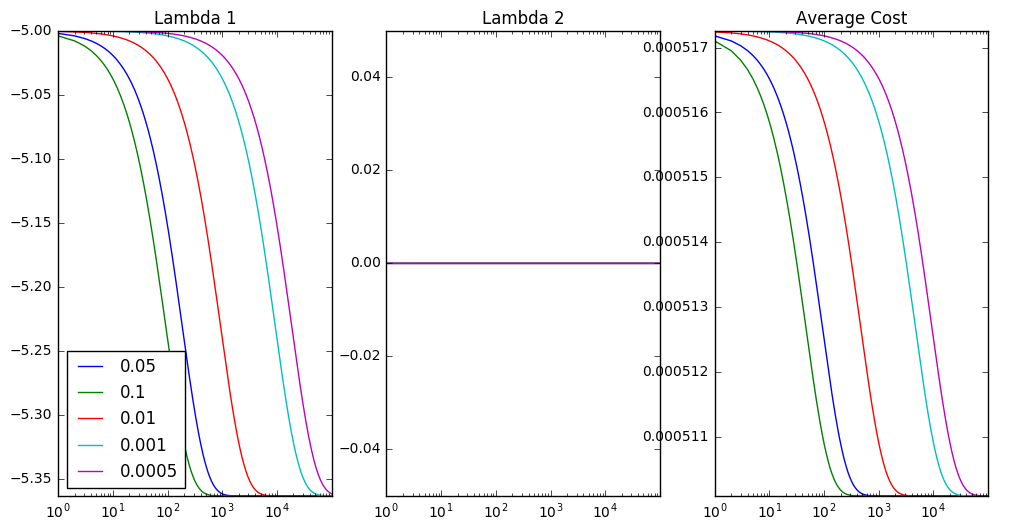

In [35]:
print(-5,0)
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))
axes[0].semilogx(range(len(dict_lambda1[0.05])), dict_lambda1[0.05],'b',label='0.05')
axes[0].semilogx(range(len(dict_lambda1[0.1])), dict_lambda1[0.1],'g',label='0.1')
axes[0].semilogx(range(len(dict_lambda1[0.01])), dict_lambda1[0.01],'r',label='0.01')
axes[0].semilogx(range(len(dict_lambda1[0.001])), dict_lambda1[0.001],'c',label='0.001')
axes[0].semilogx(range(len(dict_lambda1[0.0005])), dict_lambda1[0.0005],'m',label='0.0005')
axes[0].set_title("Lambda 1")
axes[0].axis('tight')
axes[0].legend(loc='lower left')

axes[1].semilogx(range(len(dict_lambda2[0.05])), dict_lambda2[0.05],'b',label='0.05')
axes[1].semilogx(range(len(dict_lambda2[0.1])), dict_lambda2[0.1],'g',label='0.1')
axes[1].semilogx(range(len(dict_lambda2[0.01])), dict_lambda2[0.01],'r',label='0.01')
axes[1].semilogx(range(len(dict_lambda2[0.001])), dict_lambda2[0.001],'c',label='0.001')
axes[1].semilogx(range(len(dict_lambda2[0.0005])), dict_lambda2[0.0005],'m',label='0.0005')
axes[1].set_title("Lambda 2")
axes[1].axis('tight')

axes[2].semilogx(range(len(dict_error[0.05])), dict_error[0.05],'b',label='0.05')
axes[2].semilogx(range(len(dict_error[0.1])), dict_error[0.1],'g',label='0.1')
axes[2].semilogx(range(len(dict_error[0.01])), dict_error[0.01],'r',label='0.01')
axes[2].semilogx(range(len(dict_error[0.001])), dict_error[0.001],'c',label='0.001')
axes[2].semilogx(range(len(dict_error[0.0005])), dict_error[0.0005],'m',label='0.0005')
axes[2].set_title("Average Cost")
axes[2].axis('tight')



In [36]:
import theano
from theano import *
import theano.tensor as T
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:

    start_time = time.time()
    ##for 
    la1 = theano.shared(value=-np.float(10), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    x = T.dvector("x")
    y = T.dvector("y")

    ##Construct Theano expression graph
    loss = (0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    cost = 1000*T.mean(loss)
    gw = T.grad(cost=cost, wrt=la1)
    gb = T.grad(cost=cost, wrt=la2)                 

    eta = step # Learning rate
    train = theano.function(
              inputs=[x,y],
              outputs=[cost],
              updates=((la1, la1 - eta * gw), (la2, la2 - eta * gb)),
              name='train',allow_input_downcast=True)

    n_epochs = 100000

    errors = np.zeros(n_epochs)
    lambda1 = []
    lambda2 = []

    for i in range(n_epochs):
        lambda1.append(la1.get_value())
        lambda2.append(la2.get_value())
        #remove the multiplier effect to compare the actual average cost
        errors[i] = train(xi,yi)[0]/1000  
        #stopping function
        if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
            print('Iteration stops at epoch',i)
            errors = errors[:i+1]
            break
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    print("%f seconds" % (time.time() - start_time))


94.994533 seconds
88.263382 seconds
83.225883 seconds
82.959707 seconds
83.415555 seconds


Visualizing the cost minimalization during the batch gradient descent:

-10 0


(1.0, 99999.0, 0.00051009554368611264, 0.0012483679077174075)

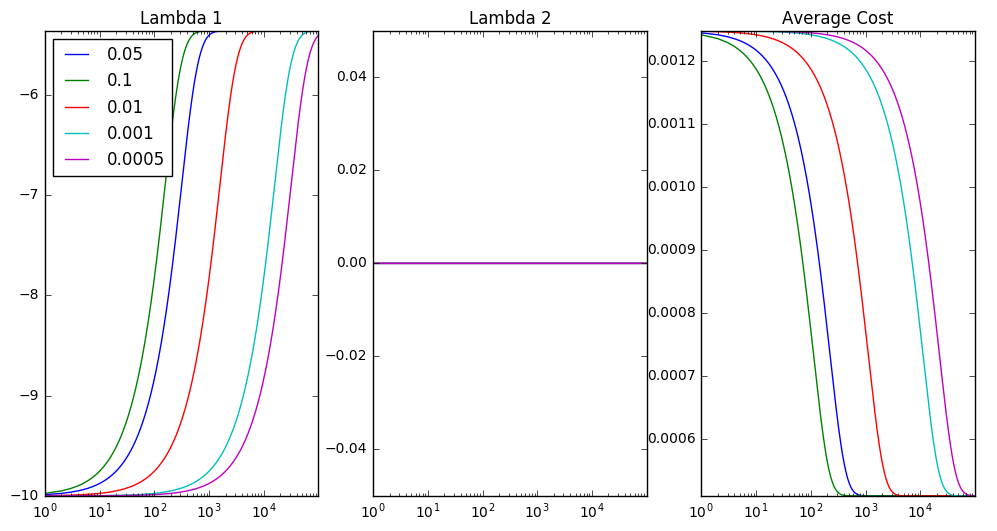

In [39]:
print(-10,0)
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))
axes[0].semilogx(range(len(dict_lambda1[0.05])), dict_lambda1[0.05],'b',label='0.05')
axes[0].semilogx(range(len(dict_lambda1[0.1])), dict_lambda1[0.1],'g',label='0.1')
axes[0].semilogx(range(len(dict_lambda1[0.01])), dict_lambda1[0.01],'r',label='0.01')
axes[0].semilogx(range(len(dict_lambda1[0.001])), dict_lambda1[0.001],'c',label='0.001')
axes[0].semilogx(range(len(dict_lambda1[0.0005])), dict_lambda1[0.0005],'m',label='0.0005')
axes[0].set_title("Lambda 1")
axes[0].axis('tight')
axes[0].legend(loc='upper left')

axes[1].semilogx(range(len(dict_lambda2[0.05])), dict_lambda2[0.05],'b',label='0.05')
axes[1].semilogx(range(len(dict_lambda2[0.1])), dict_lambda2[0.1],'g',label='0.1')
axes[1].semilogx(range(len(dict_lambda2[0.01])), dict_lambda2[0.01],'r',label='0.01')
axes[1].semilogx(range(len(dict_lambda2[0.001])), dict_lambda2[0.001],'c',label='0.001')
axes[1].semilogx(range(len(dict_lambda2[0.0005])), dict_lambda2[0.0005],'m',label='0.0005')
axes[1].set_title("Lambda 2")
axes[1].axis('tight')

axes[2].semilogx(range(len(dict_error[0.05])), dict_error[0.05],'b',label='0.05')
axes[2].semilogx(range(len(dict_error[0.1])), dict_error[0.1],'g',label='0.1')
axes[2].semilogx(range(len(dict_error[0.01])), dict_error[0.01],'r',label='0.01')
axes[2].semilogx(range(len(dict_error[0.001])), dict_error[0.001],'c',label='0.001')
axes[2].semilogx(range(len(dict_error[0.0005])), dict_error[0.0005],'m',label='0.0005')
axes[2].set_title("Average Cost")
axes[2].axis('tight')



By looking at the each starting point, I have the following observations regarding gradient descent:

- At each starting point, eventually $\lambda_1$ and $\lambda_2 $ converge to [-5.36,0], which is a local minima, with loss function of 0.00051
- Starting point at [-2,0] gives a steeper descent than at [-6,0], starting at [-10,0] also means the descent increases value of $\lambda_1$ from -1o to -6, whereas at other starting pt the descent decreases value of the $\lambda_1$
- At each start point, curves of different learning rate has the same curvature (shape), but with higher learning rate, the descent begins earlier 

## Now moving to the stochastic radient descent part


Starting Point 1:
Initializing with $\lambda_1$ = -2.47865, $\lambda_2$ = 0

In [116]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:
    start_time = time.time()
    ##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
    la1 = theano.shared(value=-np.float(2.47865), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
    costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
    counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

    x = T.dscalar('x')
    y = T.dscalar('y')


    # I have scaled the loss function with a multiple of 1000 to accelerate the descent 
    loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    gw = T.grad(cost=loss, wrt=la1)
    gb = T.grad(cost=loss, wrt=la2)

    # Set Up the Training Function with a learning rate of 0.001 
    eta = step
    train = theano.function(
              inputs=[x,y],
              outputs=[loss],
              updates=((la1, la1 - eta * gw), 
                       (la2, la2 - eta * gb),
                        (costsum,costsum+loss),
                        (counter,counter+1)),
              name='train',allow_input_downcast=True)

    #setting up maximum number of epochs
    n_epochs = 100

    #initializing 
    errors = []
    lambda1 = []
    lambda2 = []
    all_cost = []
    avg_cost = []

    #starting 
    lambda1.append(la1.get_value())
    lambda2.append(la2.get_value())
    print('initializing lambda at',lambda1,lambda2,'learning rate =',eta)

    for q in range(n_epochs):
        xi = df[0,:]
        yi = df[1,:]
        neworder = np.random.permutation(len(xi))
        xi = xi[neworder]
        yi = yi[neworder]

        for i in range(len(xi)): 
            lambda1.append(la1.get_value())
            lambda2.append(la2.get_value())
            cost_gd = train(xi[i],yi[i])
            counter_now = counter.get_value()
            costsum_now = costsum.get_value()
            avg_cost.append(costsum_now/counter_now)

            if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
                print('Iteration stops at epoch',q)
                print("%f seconds" % (time.time() - start_time))
                break
        else:
            continue
        break
    
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    

initializing lambda at [array(-2.47865)] [array(0.0)] learning rate = 0.0005
initializing lambda at [array(-2.47865)] [array(0.0)] learning rate = 0.001
initializing lambda at [array(-2.47865)] [array(0.0)] learning rate = 0.05
Iteration stops at epoch 1
2.469734 seconds
initializing lambda at [array(-2.47865)] [array(0.0)] learning rate = 0.01
initializing lambda at [array(-2.47865)] [array(0.0)] learning rate = 0.1
Iteration stops at epoch 4
5.260280 seconds


In [117]:
print('initial lambda 1 = -2.47865, lambda 2 = 0')
print('learning rate = 0.0005','final lambda 1 =',dict_lambda1[0.0005][-1])
print('learning rate = 0.001','final lambda 1 =',dict_lambda1[0.001][-1])
print('learning rate = 0.01','final lambda 1 =',dict_lambda1[0.01][-1])
print('learning rate = 0.05','final lambda 1 =',dict_lambda1[0.05][-1])
print('learning rate = 0.1','final lambda 1 =',dict_lambda1[0.1][-1])

initial lambda 1 = -2.47865, lambda 2 = 0
learning rate = 0.0005 final lambda 1 = -2.4786462520098698
learning rate = 0.001 final lambda 1 = -2.478646251942027
learning rate = 0.01 final lambda 1 = -2.478646251973432
learning rate = 0.05 final lambda 1 = 2.0547397005039496
learning rate = 0.1 final lambda 1 = 2.0540527965794055



Starting Point 1:
Initializing with $\lambda_1$ = -3, $\lambda_2$ = 0

In [112]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:
    start_time = time.time()
    ##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
    la1 = theano.shared(value=-np.float(3), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
    costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
    counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

    x = T.dscalar('x')
    y = T.dscalar('y')


    # I have scaled the loss function with a multiple of 1000 to accelerate the descent 
    loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    gw = T.grad(cost=loss, wrt=la1)
    gb = T.grad(cost=loss, wrt=la2)

    # Set Up the Training Function with a learning rate of 0.001 
    eta = step
    train = theano.function(
              inputs=[x,y],
              outputs=[loss],
              updates=((la1, la1 - eta * gw), 
                       (la2, la2 - eta * gb),
                        (costsum,costsum+loss),
                        (counter,counter+1)),
              name='train',allow_input_downcast=True)

    #setting up maximum number of epochs
    n_epochs = 100

    #initializing 
    errors = []
    lambda1 = []
    lambda2 = []
    all_cost = []
    avg_cost = []

    #starting 
    lambda1.append(la1.get_value())
    lambda2.append(la2.get_value())
    print('initializing lambda at',lambda1,lambda2,'learning rate =',eta)

    for q in range(n_epochs):
        xi = df[0,:]
        yi = df[1,:]
        neworder = np.random.permutation(len(xi))
        xi = xi[neworder]
        yi = yi[neworder]

        for i in range(len(xi)): 
            lambda1.append(la1.get_value())
            lambda2.append(la2.get_value())
            cost_gd = train(xi[i],yi[i])
            counter_now = counter.get_value()
            costsum_now = costsum.get_value()
            avg_cost.append(costsum_now/counter_now)

            if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
                print('Iteration stops at epoch',q)
                print("%f seconds" % (time.time() - start_time))
                break
        else:
            continue
        break
    
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    

initializing lambda at [array(-3.0)] [array(0.0)] learning rate = 0.0005
initializing lambda at [array(-3.0)] [array(0.0)] learning rate = 0.001
initializing lambda at [array(-3.0)] [array(0.0)] learning rate = 0.05
Iteration stops at epoch 1
2.777952 seconds
initializing lambda at [array(-3.0)] [array(0.0)] learning rate = 0.01
initializing lambda at [array(-3.0)] [array(0.0)] learning rate = 0.1
Iteration stops at epoch 8
9.164260 seconds


In [115]:
print('initial lambda 1 = -3, lambda 2 = 0')
print('learning rate = 0.0005','final lambda 1 =',dict_lambda1[0.0005][-1])
print('learning rate = 0.001','final lambda 1 =',dict_lambda1[0.001][-1])
print('learning rate = 0.01','final lambda 1 =',dict_lambda1[0.01][-1])
print('learning rate = 0.05','final lambda 1 =',dict_lambda1[0.05][-1])
print('learning rate = 0.1','final lambda 1 =',dict_lambda1[0.1][-1])

learning rate = 0.0005 final lambda 1 = -5.3632492602095585
learning rate = 0.001 final lambda 1 = -2.4786462519901464
learning rate = 0.01 final lambda 1 = -2.47864625189921
learning rate = 0.05 final lambda 1 = 2.054106252303297
learning rate = 0.1 final lambda 1 = 2.0533144255252664



Starting Point 1:
Initializing with $\lambda_1$ = -5, $\lambda_2$ = 0

In [118]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:
    start_time = time.time()
    ##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
    la1 = theano.shared(value=-np.float(5), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
    costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
    counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

    x = T.dscalar('x')
    y = T.dscalar('y')


    # I have scaled the loss function with a multiple of 1000 to accelerate the descent 
    loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    gw = T.grad(cost=loss, wrt=la1)
    gb = T.grad(cost=loss, wrt=la2)

    # Set Up the Training Function with a learning rate of 0.001 
    eta = step
    train = theano.function(
              inputs=[x,y],
              outputs=[loss],
              updates=((la1, la1 - eta * gw), 
                       (la2, la2 - eta * gb),
                        (costsum,costsum+loss),
                        (counter,counter+1)),
              name='train',allow_input_downcast=True)

    #setting up maximum number of epochs
    n_epochs = 100

    #initializing 
    errors = []
    lambda1 = []
    lambda2 = []
    all_cost = []
    avg_cost = []

    #starting 
    lambda1.append(la1.get_value())
    lambda2.append(la2.get_value())
    print('initializing lambda at',lambda1,lambda2,'learning rate =',eta)

    for q in range(n_epochs):
        xi = df[0,:]
        yi = df[1,:]
        neworder = np.random.permutation(len(xi))
        xi = xi[neworder]
        yi = yi[neworder]

        for i in range(len(xi)): 
            lambda1.append(la1.get_value())
            lambda2.append(la2.get_value())
            cost_gd = train(xi[i],yi[i])
            counter_now = counter.get_value()
            costsum_now = costsum.get_value()
            avg_cost.append(costsum_now/counter_now)

            if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
                print('Iteration stops at epoch',q)
                print("%f seconds" % (time.time() - start_time))
                break
        else:
            continue
        break
    
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    

initializing lambda at [array(-5.0)] [array(0.0)] learning rate = 0.0005
initializing lambda at [array(-5.0)] [array(0.0)] learning rate = 0.001
initializing lambda at [array(-5.0)] [array(0.0)] learning rate = 0.05
Iteration stops at epoch 0
1.070257 seconds
initializing lambda at [array(-5.0)] [array(0.0)] learning rate = 0.01
initializing lambda at [array(-5.0)] [array(0.0)] learning rate = 0.1
Iteration stops at epoch 2
3.822704 seconds


In [119]:
print('initial lambda 1 = -5, lambda 2 = 0')
print('learning rate = 0.0005','final lambda 1 =',dict_lambda1[0.0005][-1])
print('learning rate = 0.001','final lambda 1 =',dict_lambda1[0.001][-1])
print('learning rate = 0.01','final lambda 1 =',dict_lambda1[0.01][-1])
print('learning rate = 0.05','final lambda 1 =',dict_lambda1[0.05][-1])
print('learning rate = 0.1','final lambda 1 =',dict_lambda1[0.1][-1])

initial lambda 1 = -5, lambda 2 = 0
learning rate = 0.0005 final lambda 1 = -5.363249260213664
learning rate = 0.001 final lambda 1 = -5.363249260174053
learning rate = 0.01 final lambda 1 = -5.363249259870317
learning rate = 0.05 final lambda 1 = 2.0537808994923195
learning rate = 0.1 final lambda 1 = 2.054041975893412



Starting Point 1:
Initializing with $\lambda_1$ = -10, $\lambda_2$ = 0

In [120]:
# at the beginning:
start_time = time.time()

##set up the dataframe
df= pd.read_csv(r'C:\Users\Dell\Documents\Python Scripts\HW3_data.csv', sep=',',header=None)
df=df.as_matrix(columns=None)
xi = df[0,:]
yi = df[1,:]
neworder = np.random.permutation(10000)
xi = xi[neworder]
yi = yi[neworder]

dict_error = {}
dict_lambda1 = {}
dict_lambda2 = {}
                                                                                              
# Set Up the Training Function 
step_size = [0.0005,0.001,0.05,0.01,0.1]

for step in step_size:
    start_time = time.time()
    ##initiatize lambda1 as -1, lambda3 as 3, same as what I did at gradient descent
    la1 = theano.shared(value=-np.float(10), name='la1',borrow=True)
    la2 = theano.shared(value=np.float(0), name='la2',borrow=True)
    cost = theano.shared(value=np.zeros(1), name='cost',borrow=True)
    costsum = theano.shared(value=np.zeros(1), name='counter',borrow=True)
    counter = theano.shared(value=np.zeros(1), name='counter',borrow=True)

    x = T.dscalar('x')
    y = T.dscalar('y')


    # I have scaled the loss function with a multiple of 1000 to accelerate the descent 
    loss = 1000*(0.000045*(la2**2)*y - 0.000098*(la1**2)*x + 0.003926*la1*x*T.exp((y**2-x**2)*(la1**2+la2**2)))
    gw = T.grad(cost=loss, wrt=la1)
    gb = T.grad(cost=loss, wrt=la2)

    # Set Up the Training Function with a learning rate of 0.001 
    eta = step
    train = theano.function(
              inputs=[x,y],
              outputs=[loss],
              updates=((la1, la1 - eta * gw), 
                       (la2, la2 - eta * gb),
                        (costsum,costsum+loss),
                        (counter,counter+1)),
              name='train',allow_input_downcast=True)

    #setting up maximum number of epochs
    n_epochs = 100

    #initializing 
    errors = []
    lambda1 = []
    lambda2 = []
    all_cost = []
    avg_cost = []

    #starting 
    lambda1.append(la1.get_value())
    lambda2.append(la2.get_value())
    print('initializing lambda at',lambda1,lambda2,'learning rate =',eta)

    for q in range(n_epochs):
        xi = df[0,:]
        yi = df[1,:]
        neworder = np.random.permutation(len(xi))
        xi = xi[neworder]
        yi = yi[neworder]

        for i in range(len(xi)): 
            lambda1.append(la1.get_value())
            lambda2.append(la2.get_value())
            cost_gd = train(xi[i],yi[i])
            counter_now = counter.get_value()
            costsum_now = costsum.get_value()
            avg_cost.append(costsum_now/counter_now)

            if np.linalg.norm(np.array([lambda1[-1], lambda2[-1]]) - np.array([2.05384, 0])) < 0.001:
                print('Iteration stops at epoch',q)
                print("%f seconds" % (time.time() - start_time))
                break
        else:
            continue
        break
    
    dict_error[step]= errors
    dict_lambda1[step]= lambda1
    dict_lambda2[step]= lambda2
    

initializing lambda at [array(-10.0)] [array(0.0)] learning rate = 0.0005
initializing lambda at [array(-10.0)] [array(0.0)] learning rate = 0.001
initializing lambda at [array(-10.0)] [array(0.0)] learning rate = 0.05
Iteration stops at epoch 0
1.464536 seconds
initializing lambda at [array(-10.0)] [array(0.0)] learning rate = 0.01
initializing lambda at [array(-10.0)] [array(0.0)] learning rate = 0.1
Iteration stops at epoch 4
5.470870 seconds


In [121]:
print('initial lambda 1 = -10, lambda 2 = 0')
print('learning rate = 0.0005','final lambda 1 =',dict_lambda1[0.0005][-1])
print('learning rate = 0.001','final lambda 1 =',dict_lambda1[0.001][-1])
print('learning rate = 0.01','final lambda 1 =',dict_lambda1[0.01][-1])
print('learning rate = 0.05','final lambda 1 =',dict_lambda1[0.05][-1])
print('learning rate = 0.1','final lambda 1 =',dict_lambda1[0.1][-1])

initial lambda 1 = -10, lambda 2 = 0
learning rate = 0.0005 final lambda 1 = -5.3632492602714406
learning rate = 0.001 final lambda 1 = -5.363249260228777
learning rate = 0.01 final lambda 1 = -5.363249260274904
learning rate = 0.05 final lambda 1 = 2.053387066141352
learning rate = 0.1 final lambda 1 = 2.0537576065186673


In [ ]:
[0.0005,0.001,0.01,0.05,0.1]
-2.47865: [-2.47865,-2.47865,-2.47865,2.054,2.054]
-3: [-5.36,-2.47865,-2.47865,2.054,2.054]
-5: [-5.36,-5.36,-5.36,2.054,2.054]
-10: [-5.36,-5.36,-5.36,2.054,2.054]